In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 0. Load Data

In [2]:
data = pd.read_csv('../data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [3]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


## 1. Data Analysis: First Sight

### How is the date distribuited?

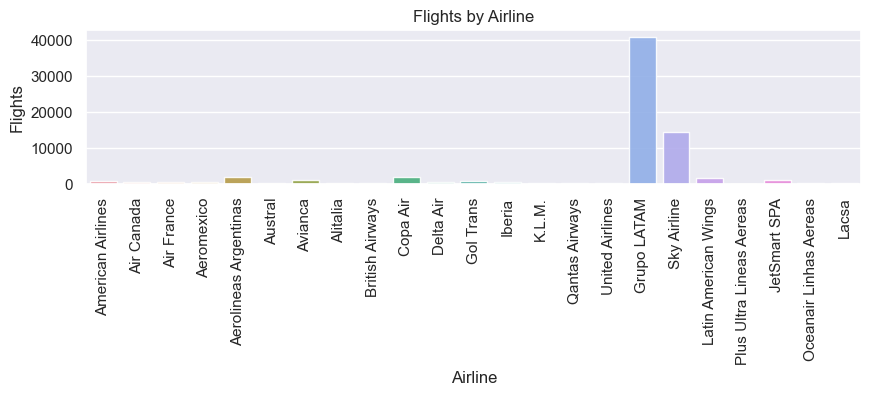

In [4]:
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.countplot(data, x=data['OPERA'], alpha=0.9)
plt.title('Flights by Airline')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

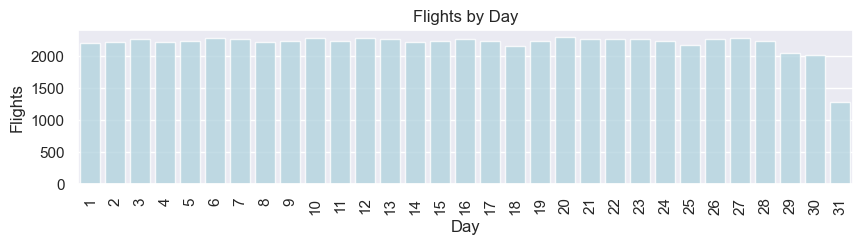

In [65]:
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.countplot(data, x=data['DIA'], color = 'lightblue', alpha=0.8)
plt.title('Flights by Day')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation=90)
plt.show()

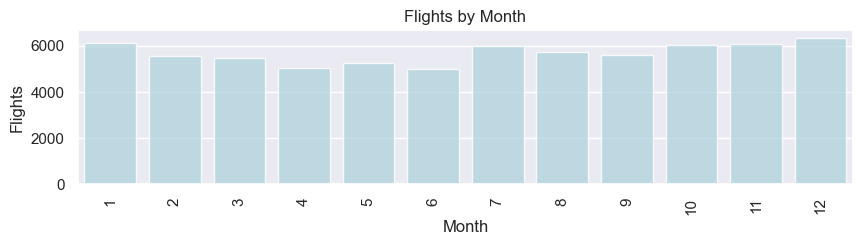

In [66]:
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.countplot(data, x=data['MES'], color = 'lightblue', alpha=0.8)
plt.title('Flights by Month')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.show()

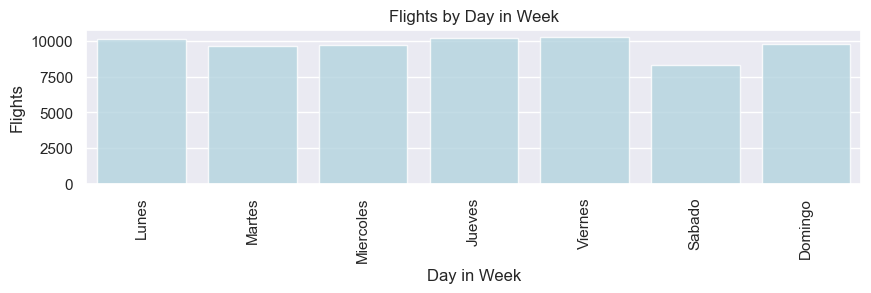

In [67]:
flights_by_month = data['DIANOM'].value_counts()
days = [
    flights_by_month.index[2], 
    flights_by_month.index[5], 
    flights_by_month.index[4], 
    flights_by_month.index[1], 
    flights_by_month.index[0], 
    flights_by_month.index[6], 
    flights_by_month.index[3]
]
values_by_day = [
    flights_by_month.values[2], 
    flights_by_month.values[5], 
    flights_by_month.values[4], 
    flights_by_month.values[1], 
    flights_by_month.values[0], 
    flights_by_month.values[6], 
    flights_by_month.values[3]
]

plt.figure(figsize=(10, 2))
sns.set(style="darkgrid")
sns.barplot(x=days, y=values_by_day, color='lightblue', alpha=0.8)  # Corrected line
plt.title('Flights by Day in Week')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day in Week', fontsize=12)
plt.xticks(rotation=90)
plt.show()

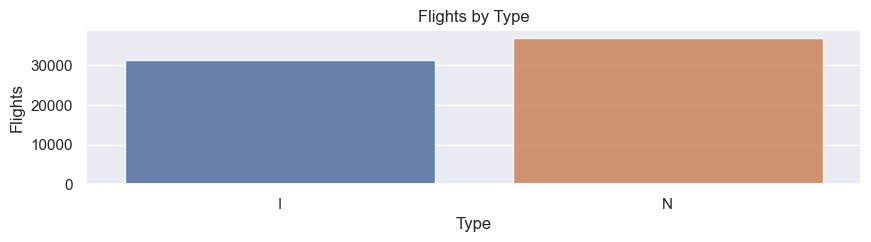

In [47]:
sns.set(style="darkgrid")
plt.figure(figsize = (10, 2))
sns.countplot(data, x=data['TIPOVUELO'], alpha=0.9)
plt.title('Flights by Type')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

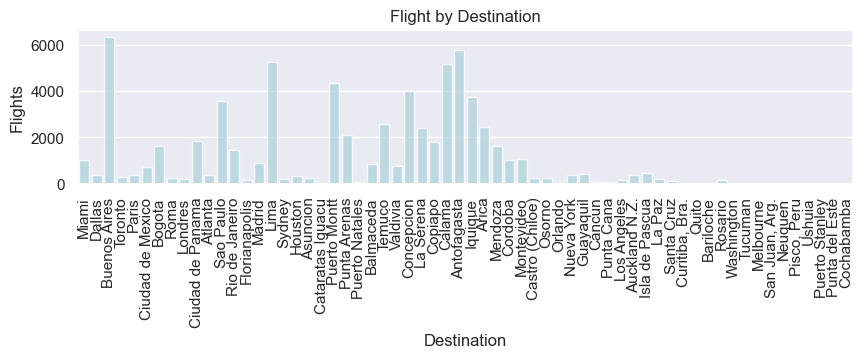

In [49]:
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.countplot(data, x=data['SIGLADES'], color = 'lightblue', alpha=0.8)
plt.title('Flight by Destination')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)

plt.show()

## 2. Features Generation

### 2.a. Period of Day

In [5]:
from datetime import datetime

def get_period_day(date):
    date_time = datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time()
    morning_min = datetime.strptime("05:00", '%H:%M').time()
    morning_max = datetime.strptime("11:59", '%H:%M').time()
    afternoon_min = datetime.strptime("12:00", '%H:%M').time()
    afternoon_max = datetime.strptime("18:59", '%H:%M').time()
    evening_min = datetime.strptime("19:00", '%H:%M').time()
    evening_max = datetime.strptime("23:59", '%H:%M').time()
    night_min = datetime.strptime("00:00", '%H:%M').time()
    night_max = datetime.strptime("4:59", '%H:%M').time()
    
    if(date_time > morning_min and date_time < morning_max):
        return 'mañana'
    elif(date_time > afternoon_min and date_time < afternoon_max):
        return 'tarde'
    elif(
        (date_time > evening_min and date_time < evening_max) or
        (date_time > night_min and date_time < night_max)
    ):
        return 'noche'

In [6]:
data['period_day'] = data['Fecha-I'].apply(get_period_day)

In [7]:
data[['Fecha-I','period_day']]

,Fecha-I,period_day
0,2017-01-01 23:30:00,noche
1,2017-01-02 23:30:00,noche
2,2017-01-03 23:30:00,noche
3,2017-01-04 23:30:00,noche
4,2017-01-05 23:30:00,noche
...,...,...
68201,2017-12-22 14:55:00,tarde
68202,2017-12-25 14:55:00,tarde
68203,2017-12-27 14:55:00,tarde
68204,2017-12-29 14:55:00,tarde


### 2.b. High Season

In [8]:
from datetime import datetime

def is_high_season(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime(f'{fecha_año}-12-15', '%Y-%m-%d')
    range1_max = datetime.strptime(f'{fecha_año}-12-31', '%Y-%m-%d')
    range2_min = datetime.strptime(f'{fecha_año}-01-01', '%Y-%m-%d')
    range2_max = datetime.strptime(f'{fecha_año}-03-03', '%Y-%m-%d')
    range3_min = datetime.strptime(f'{fecha_año}-07-15', '%Y-%m-%d')
    range3_max = datetime.strptime(f'{fecha_año}-07-31', '%Y-%m-%d')
    range4_min = datetime.strptime(f'{fecha_año}-09-11', '%Y-%m-%d')
    range4_max = datetime.strptime(f'{fecha_año}-09-30', '%Y-%m-%d')
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0

In [9]:
data['high_season'] = data['Fecha-I'].apply(is_high_season)

In [10]:
data[['Fecha-I','high_season']]

,Fecha-I,high_season
0,2017-01-01 23:30:00,1
1,2017-01-02 23:30:00,1
2,2017-01-03 23:30:00,1
3,2017-01-04 23:30:00,1
4,2017-01-05 23:30:00,1
...,...,...
68201,2017-12-22 14:55:00,1
68202,2017-12-25 14:55:00,1
68203,2017-12-27 14:55:00,1
68204,2017-12-29 14:55:00,1


### 2.c. Difference in Minutes

In [11]:
def get_min_diff(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    min_diff = ((fecha_o - fecha_i).total_seconds())/60
    return min_diff

In [12]:
data['min_diff'] = data.apply(get_min_diff, axis = 1)

In [13]:
data[data['min_diff']>60].shape[0]

1981

### 2.d. Delay

In [14]:
threshold_in_minutes = 15
data['delay'] = np.where(data['min_diff'] > threshold_in_minutes, 1, 0)

In [15]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'period_day', 'high_season',
       'min_diff', 'delay'],
      dtype='object')

## 3. Data Analysis: Second Sight

### How is the delay rate across columns?

In [16]:
def get_rate_from_column(data, column):
    # Filter the DataFrame to include only rows with delay == 1
    delayed_data = data[data['delay'] == 1]
    
    # Count the delays for each unique value in the specified column
    delays = delayed_data[column].value_counts().to_dict()
    
    # Calculate the total counts for each unique value in the specified column
    total_counts = data[column].value_counts().to_dict()
    
    # Calculate rates using dictionary comprehensions
    rates = {name: round(total_counts.get(name, 0) / delays.get(name, 1), 2) for name in total_counts}
    
    # Create a DataFrame from the rates dictionary
    result_df = pd.DataFrame.from_dict(data=rates, orient='index', columns=['Tasa (%)'])
    
    return result_df

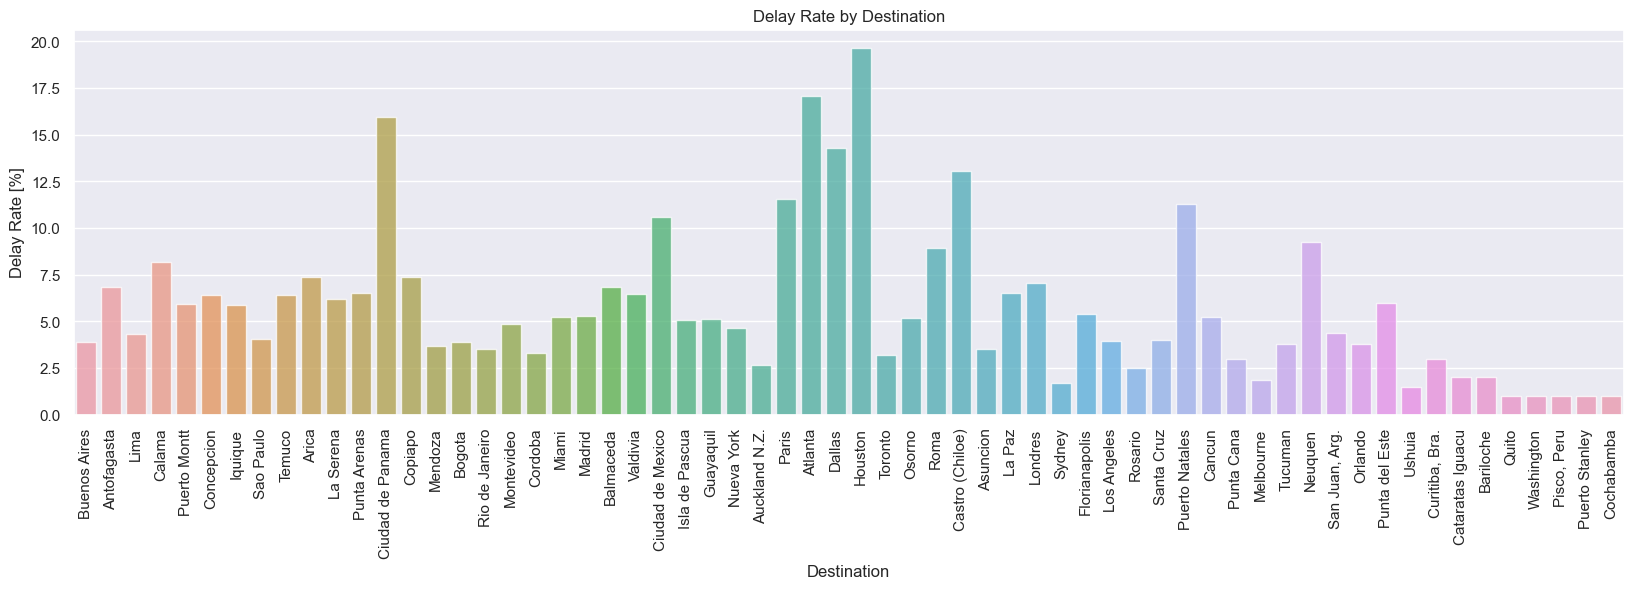

In [80]:
destination_rate = get_rate_from_column(data, 'SIGLADES')
destination_rate_values = data['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=destination_rate_values, y=destination_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Destination')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)
plt.show()


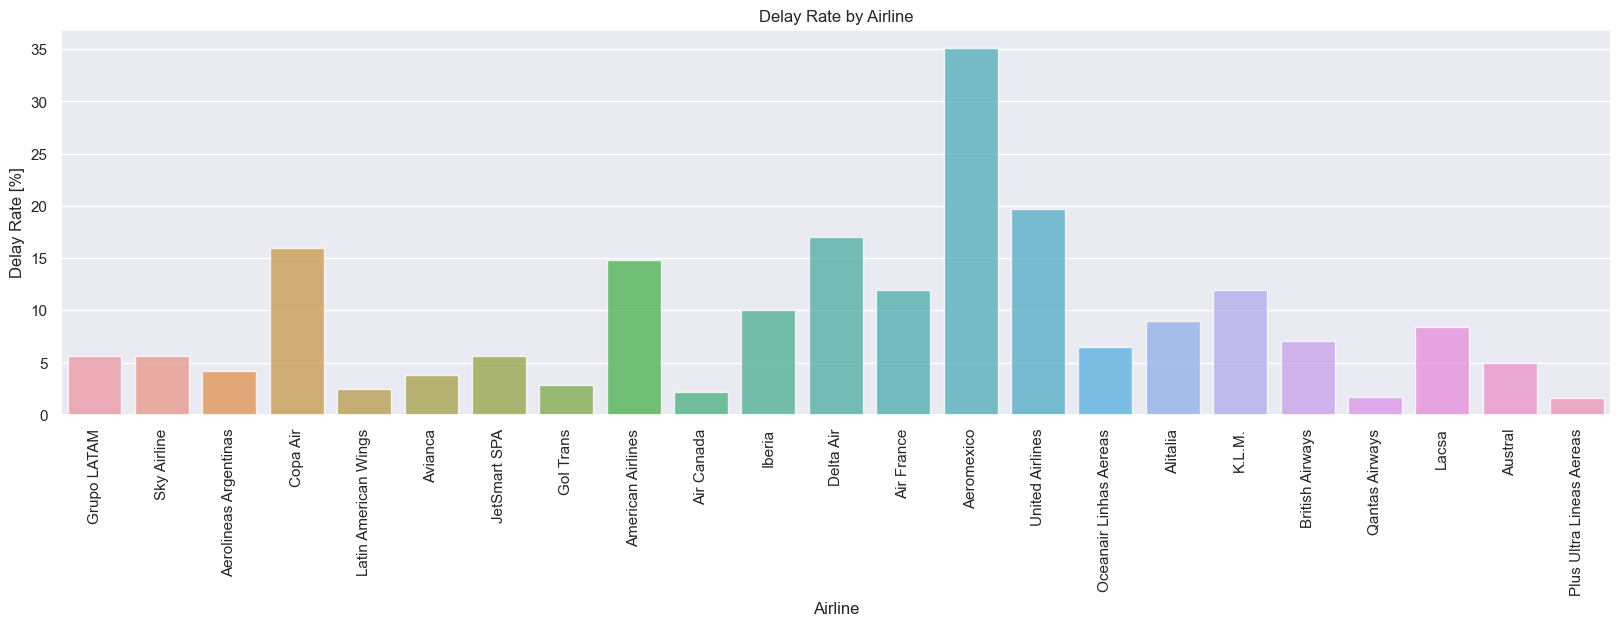

In [34]:
airlines_rate = get_rate_from_column(data, 'OPERA')
airlines_rate_values = data['OPERA'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=airlines_rate_values, y=airlines_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Airline')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

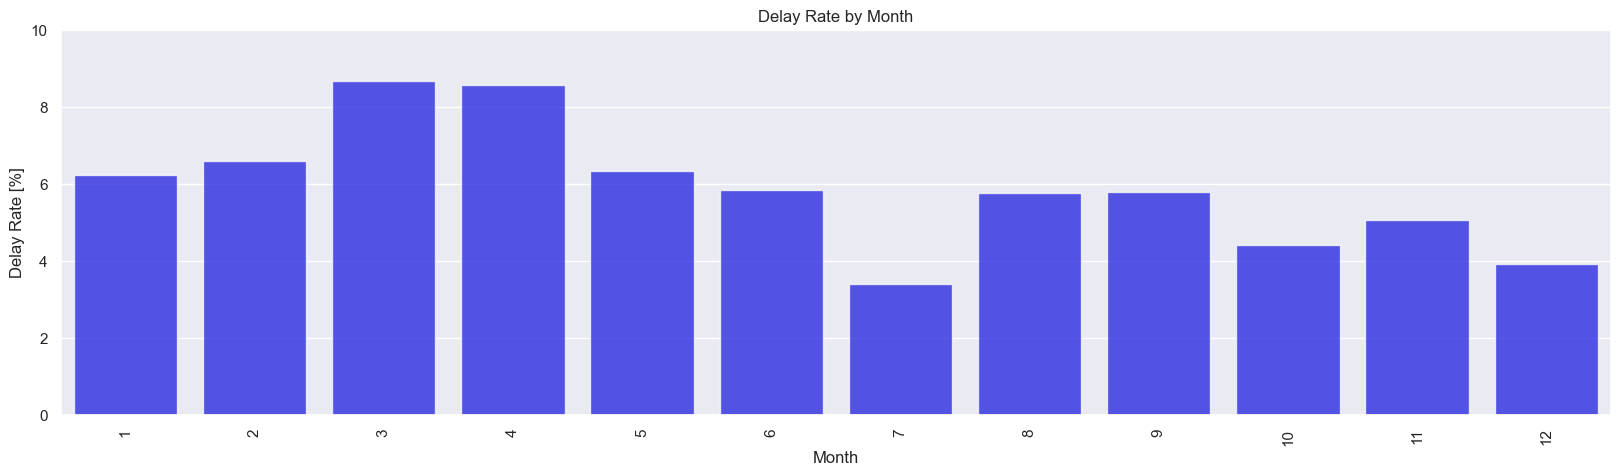

In [35]:
month_rate = get_rate_from_column(data, 'MES')
month_rate_value = data['MES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=month_rate_value, y=month_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Month')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,10)
plt.show()

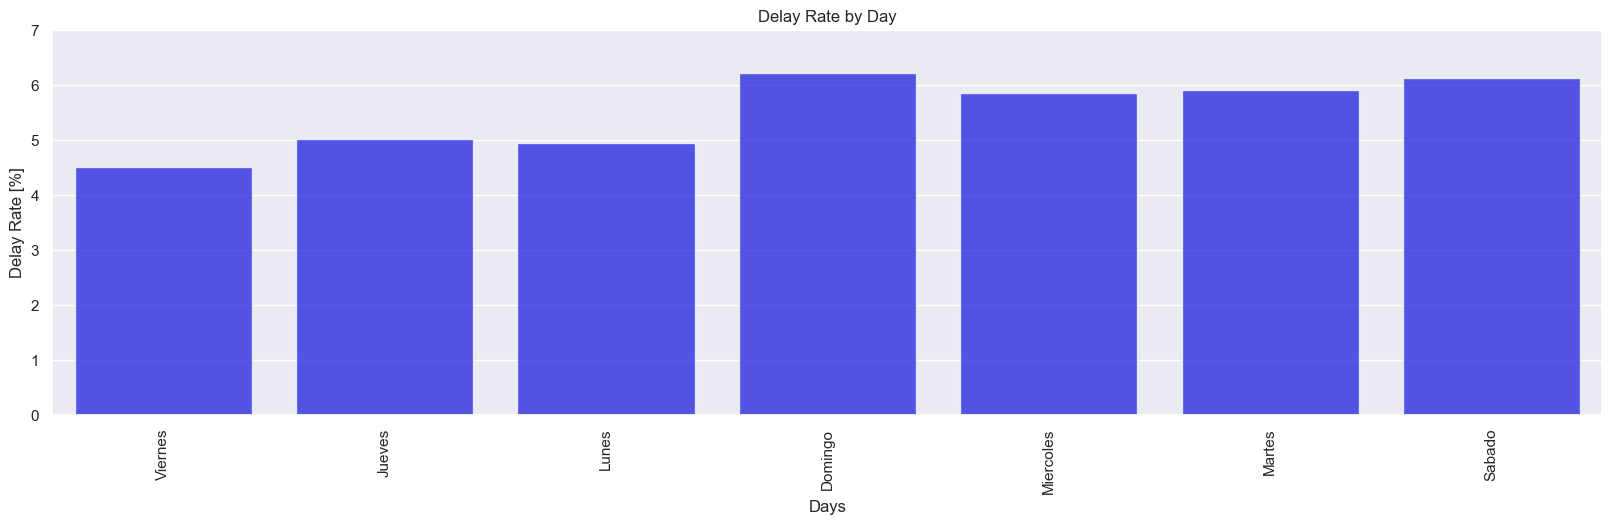

In [36]:
days_rate = get_rate_from_column(data, 'DIANOM')
days_rate_value = data['DIANOM'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (20, 5))
sns.barplot(x=days_rate_value, y=days_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Days', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,7)
plt.show()

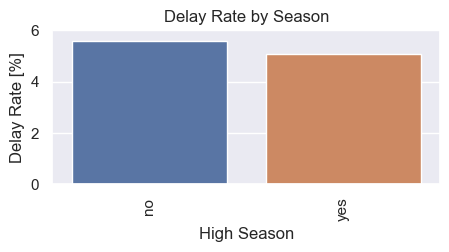

In [37]:
high_season_rate = get_rate_from_column(data, 'high_season')
high_season_rate_values = data['high_season'].value_counts().index

plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=["no", "yes"], y=high_season_rate['Tasa (%)'])
plt.title('Delay Rate by Season')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('High Season', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,6)
plt.show()

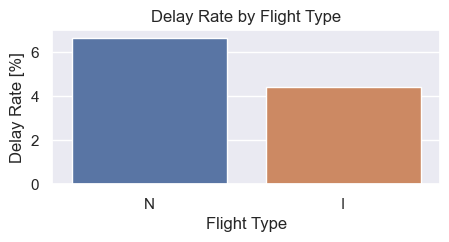

In [38]:
flight_type_rate = get_rate_from_column(data, 'TIPOVUELO')
flight_type_rate_values = data['TIPOVUELO'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=flight_type_rate_values, y=flight_type_rate['Tasa (%)'])
plt.title('Delay Rate by Flight Type')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Flight Type', fontsize=12)
plt.ylim(0,7)
plt.show()

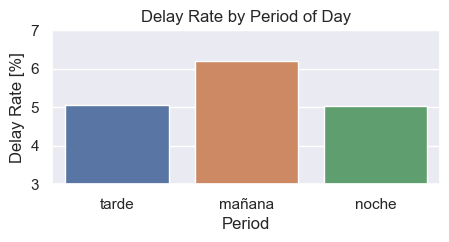

In [39]:
period_day_rate = get_rate_from_column(data, 'period_day')
period_day_rate_values = data['period_day'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=period_day_rate_values, y=period_day_rate['Tasa (%)'])
plt.title('Delay Rate by Period of Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Period', fontsize=12)
plt.ylim(3,7)
plt.show()

## 4. Training

### 4.a. Data Split (Training and Validation)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
training_data = shuffle(data[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'delay']], random_state = 111)

In [20]:
features = pd.concat([
    pd.get_dummies(data['OPERA'], prefix = 'OPERA'),
    pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), 
    pd.get_dummies(data['MES'], prefix = 'MES')], 
    axis = 1
)
target = data['delay']

In [21]:
features.columns

Index(['OPERA_Aerolineas Argentinas', 'OPERA_Aeromexico', 'OPERA_Air Canada',
       'OPERA_Air France', 'OPERA_Alitalia', 'OPERA_American Airlines',
       'OPERA_Austral', 'OPERA_Avianca', 'OPERA_British Airways',
       'OPERA_Copa Air', 'OPERA_Delta Air', 'OPERA_Gol Trans',
       'OPERA_Grupo LATAM', 'OPERA_Iberia', 'OPERA_JetSmart SPA',
       'OPERA_K.L.M.', 'OPERA_Lacsa', 'OPERA_Latin American Wings',
       'OPERA_Oceanair Linhas Aereas', 'OPERA_Plus Ultra Lineas Aereas',
       'OPERA_Qantas Airways', 'OPERA_Sky Airline', 'OPERA_United Airlines',
       'TIPOVUELO_I', 'TIPOVUELO_N', 'MES_1', 'MES_2', 'MES_3', 'MES_4',
       'MES_5', 'MES_6', 'MES_7', 'MES_8', 'MES_9', 'MES_10', 'MES_11',
       'MES_12'],
      dtype='object')

In [22]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

In [24]:
print(f"train shape: {x_train.shape} | test shape: {x_test.shape}")

train shape: (45698, 37) | test shape: (22508, 37)


In [25]:
y_train.value_counts('%')*100

0    81.618452
1    18.381548
Name: delay, dtype: float64

In [26]:
y_test.value_counts('%')*100

0    81.277768
1    18.722232
Name: delay, dtype: float64

### 4.b. Model Selection

#### 4.b.i. XGBoost

In [35]:
import xgboost as xgb
from xgboost import plot_importance

In [36]:
xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [37]:
xgboost_y_preds = xgb_model.predict(x_test)
xgboost_y_preds = [1 if y_pred > 0.5 else 0 for y_pred in xgboost_y_preds]

In [38]:
confusion_matrix(y_test, xgboost_y_preds)

array([[18257,    37],
       [ 4121,    93]], dtype=int64)

In [39]:
print(classification_report(y_test, xgboost_y_preds))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18294
           1       0.72      0.02      0.04      4214

    accuracy                           0.82     22508
   macro avg       0.77      0.51      0.47     22508
weighted avg       0.80      0.82      0.74     22508



#### 4.b.ii. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

LogisticRegression()

In [42]:
reg_y_preds = reg_model.predict(x_test)

In [43]:
print(type(reg_y_preds.tolist()))

<class 'list'>


In [44]:
confusion_matrix(y_test, reg_y_preds)

array([[18193,   101],
       [ 4086,   128]], dtype=int64)

In [45]:
print(classification_report(y_test, reg_y_preds))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     18294
           1       0.56      0.03      0.06      4214

    accuracy                           0.81     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.81      0.74     22508



## 5. Data Analysis: Third Sight

### Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1000x500 with 0 Axes>

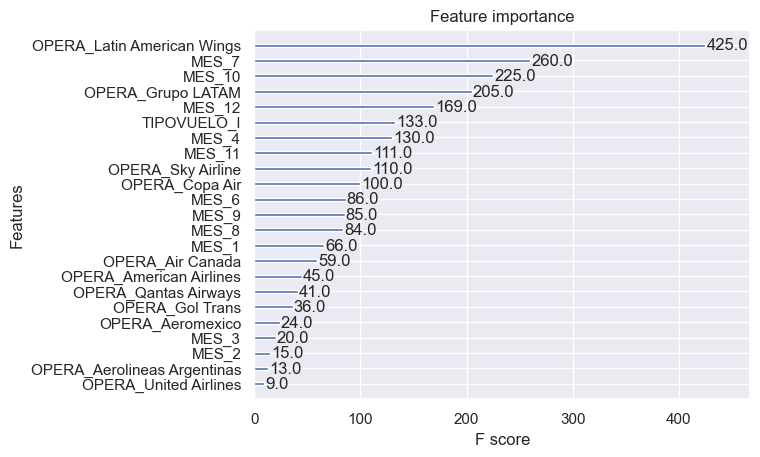

In [46]:
plt.figure(figsize = (10,5))
plot_importance(xgb_model)

In [47]:
top_10_features = [
    "OPERA_Latin American Wings", 
    "MES_7",
    "MES_10",
    "OPERA_Grupo LATAM",
    "MES_12",
    "TIPOVUELO_I",
    "MES_4",
    "MES_11",
    "OPERA_Sky Airline",
    "OPERA_Copa Air"
]

### Data Balance

In [49]:
n_y0 = len(y_train[y_train == 0])
n_y1 = len(y_train[y_train == 1])
scale = n_y0/n_y1
print(scale)

4.4402380952380955


## 6. Training with Improvement

### 6.a. Data Split

In [50]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features[top_10_features], target, test_size = 0.33, random_state = 42)

### 6.b. Model Selection

#### 6.b.i. XGBoost with Feature Importance and with Balance

In [51]:
xgb_model_2 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight = scale)
xgb_model_2.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [54]:
xgb_model_2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [55]:
xgboost_y_preds_2 = xgb_model_2.predict(x_test2)

In [56]:
confusion_matrix(y_test2, xgboost_y_preds_2)

array([[9556, 8738],
       [1313, 2901]], dtype=int64)

In [57]:
print(classification_report(y_test2, xgboost_y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.52      0.66     18294
           1       0.25      0.69      0.37      4214

    accuracy                           0.55     22508
   macro avg       0.56      0.61      0.51     22508
weighted avg       0.76      0.55      0.60     22508



#### 6.b.ii. XGBoost with Feature Importance but without Balance

In [58]:
xgb_model_3 = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model_3.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [51]:
xgboost_y_preds_3 = xgb_model_3.predict(x_test2)

In [52]:
confusion_matrix(y_test2, xgboost_y_preds_3)

array([[18282,    12],
       [ 4184,    30]], dtype=int64)

In [53]:
print(classification_report(y_test2, xgboost_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.71      0.01      0.01      4214

    accuracy                           0.81     22508
   macro avg       0.76      0.50      0.46     22508
weighted avg       0.80      0.81      0.73     22508



#### 6.b.iii. Logistic Regression with Feature Importante and with Balance

In [58]:
reg_model_2 = LogisticRegression(class_weight={1: n_y0/len(y_train), 0: n_y1/len(y_train)})
reg_model_2.fit(x_train2, y_train2)

LogisticRegression(class_weight={0: 0.18381548426626987, 1: 0.8161845157337302})

In [60]:
reg_y_preds_2 = reg_model_2.predict(x_test2)

In [46]:
confusion_matrix(y_test2, reg_y_preds_2)

array([[9487, 8807],
       [1314, 2900]], dtype=int64)

In [47]:
print(classification_report(y_test2, reg_y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.52      0.65     18294
           1       0.25      0.69      0.36      4214

    accuracy                           0.55     22508
   macro avg       0.56      0.60      0.51     22508
weighted avg       0.76      0.55      0.60     22508



#### 6.b.iv. Logistic Regression with Feature Importante but without Balance

In [74]:
reg_model_3 = LogisticRegression()
reg_model_3.fit(x_train2, y_train2)

LogisticRegression()

In [75]:
reg_y_preds_3 = reg_model_3.predict(x_test2)

In [76]:
confusion_matrix(y_test2, reg_y_preds_3)

array([[18246,    48],
       [ 4160,    54]], dtype=int64)

In [77]:
print(classification_report(y_test2, reg_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.53      0.01      0.03      4214

    accuracy                           0.81     22508
   macro avg       0.67      0.51      0.46     22508
weighted avg       0.76      0.81      0.73     22508



## 7. Data Science Conclusions

By looking at the results of the 6 trained models, it can be determined:
- There is no noticeable difference in results between XGBoost and LogisticRegression.
- Does not decrease the performance of the model by reducing the features to the 10 most important.
- Improves the model's performance when balancing classes, since it increases the recall of class "1".

**With this, the model to be productive must be the one that is trained with the top 10 features and class balancing, but which one?**

## 8. Model Saving

We'll save the model with its name, type, and date, in a newly created folder for the models.

In [59]:
import pickle
import os
from datetime import date
today = date.today()

In [56]:

today_date = today.strftime("%Y-%m-%d")

# Name and path of the file to save
model_save_folder = 'ml_models'
selected_model_type = 'LR_Feat_Imp_Balanced_{}.pkl'.format(today_date)
save_path = os.path.join('..', model_save_folder, selected_model_type)

# Save the model in pickle format
with open(save_path, 'wb') as f:
    pickle.dump(reg_model_2, f)

In [60]:
today_date = today.strftime("%Y-%m-%d")

# Name and path of the file to save
model_save_folder = 'ml_models'
selected_model_type = 'XGB_Feat_Imp_Balanced_{}.pkl'.format(today_date)
save_path = os.path.join('..', model_save_folder, selected_model_type)

# Save the model in pickle format
with open(save_path, 'wb') as f:
    pickle.dump(xgb_model_2, f)